In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
data=pd.read_csv('traingroup11.csv')

data=pd.DataFrame(data).to_numpy()

data1=data[301:,:]
data=data[0:300,:]
X_train = data[:, :2]
Y_train = data[:, 2]
plt.scatter(X_train[:,0],X_train[:,1], c=Y_train, s=30, cmap=plt.cm.Spectral);
expected_out=Y_train

In [ ]:
X_val = data1[:, :2]
Y_val = data1[:, 2]
expected_out1=Y_val

In [ ]:
X_train=X_train.T
Y_train=Y_train.T
Y_train.shape
a=Y_train
def one_hot(Y,C):
    Y=np.eye(C)[Y.reshape(-1)].T
    return Y

Y_train=Y_train.astype(int)


In [ ]:
b = np.zeros((Y_train.size, Y_train.max()+1))
b[np.arange(Y_train.size),Y_train] = 1
Y_train=b


In [ ]:
def relu(X):
   return np.maximum(0,X)
import math

def sigmoid(x):
  return 1/(1+np.exp(-x))

In [36]:
# GRADED FUNCTION: compute_cost

def compute_cost(A3, Y, parameters):
    
    
    m=451
    
    logprobs = np.multiply(np.log(A3), Y) + np.multiply((1 - Y), np.log(1e-8+1-A3))
#     print(A3)
    cost = - np.sum(logprobs) / m
    cost = float(np.squeeze(cost))
    
    return cost

In [37]:
def initparameters():
  
    l1=7
    l2=5
    
    W1 = np.random.randn(l1,2) *0.01
    b1 = np.zeros(shape=(l1, 1))
    W2 = np.random.randn(l2,l1) *0.01
    b2 = np.zeros(shape=(l2, 1))
    W3 = np.random.randn(3, l2) *0.01
    b3 = np.zeros(shape=(3, 1))
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2,
                  "W3": W3,
                  "b3": b3}
    
    return parameters

In [38]:
def forward_propagation(X, parameters):
    
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3']
   
    
    
    Z1 = np.dot(W1, X) + b1
    A1 = relu(Z1)
    
    Z2 = np.dot(W2, A1) + b2
    A2 = relu(Z2)
    
    Z3 = np.dot(W3, A2) + b3
    A3 = sigmoid(Z3)
    
   
    
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2,
             "A3": A3,
             "Z3 ":Z3}
    
    return A3, cache

In [39]:
def backward_propagation(parameters, cache, X, Y):
   
    m=451 
   
    W1 = parameters['W1']
    W2 = parameters['W2']
    W3 = parameters['W3']
        
    
    A1 = cache['A1']
    A2 = cache['A2']
    A3 = cache['A3']
    
    
    dZ3 = A3 - Y
    dW3 = (1 / m) * np.dot(dZ3, A2.T)
    db3 = (1 / m) * np.sum(dZ3, axis=1, keepdims=True)
    dZ2 = np.multiply(np.dot(W3.T, dZ3), 1 - np.power(A2, 2))
    dW2 = (1 / m) * np.dot(dZ2, A1.T)
    db2 = (1 / m) * np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = np.multiply(np.dot(W2.T, dZ2), 1 - np.power(A1, 2))
    dW1 = (1 / m) * np.dot(dZ1, X.T)
    db1 = (1 / m) * np.sum(dZ1, axis=1, keepdims=True)
    ### END CODE HERE ###
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2,
             "dW3": dW3,
             "db3": db3
            }
    
    return grads

In [40]:

def update_parameters(parameters, grads, learning_rate = 0.01):
    
    
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3']
    ### END CODE HERE ###
    
    # Retrieve each gradient from the dictionary "grads"
    ### START CODE HERE ### (≈ 4 lines of code)
    dW1 = grads['dW1']
    db1 = grads['db1']
    dW2 = grads['dW2']
    db2 = grads['db2']
    dW3 = grads['dW3']
    db3 = grads['db3']
    ## END CODE HERE ###
    
    # Update rule for each parameter
    ### START CODE HERE ### (≈ 4 lines of code)
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    W3 = W3 - learning_rate * dW3
    b3 = b3 - learning_rate * db3
    ### END CODE HERE ###
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2,
                  "W3": W3,
                  "b3": b3
                 }
    
    return parameters

In [41]:


# GRADED FUNCTION: nn_model

def nn_model(X, Y,  num_iterations = 10000, print_cost=False):
   
    
   
    parameters =initparameters()
    ### END CODE HERE ###
    
    # Loop (gradient descent)
    costs=[]
    for i in range(1, num_iterations+1):
         
        
        # Forward propagation. Inputs: "X, parameters". Outputs: "A2, cache".
        A3,cache = forward_propagation(X, parameters)
        
        # Cost function. Inputs: "A2, Y, parameters". Outputs: "cost".
        cost = compute_cost(A3,Y,parameters)
        if i % 100 == 0:
            costs.append(cost)

        # Backpropagation. Inputs: "parameters, cache, X, Y". Outputs: "grads".
        grads = backward_propagation(parameters, cache, X, Y)
 
        # Gradient descent parameter update. Inputs: "parameters, grads". Outputs: "parameters".
        parameters = update_parameters(parameters, grads)
        if(i%1000==0):
            print("cost ",cost)
        ### END CODE HERE ###
        
        # Print the cost every 1000 iterations
        
            
    return parameters,costs



In [42]:
Y_train=Y_train.T
Y_train.shape
X_train.shape

(2, 300)

In [43]:
parameters,costs = nn_model(X_train, Y_train,  num_iterations = 10000, print_cost=True)

cost  1.2746349600294005
cost  1.269481798533683
cost  1.2619839942181488
cost  1.234220562138861
cost  1.1473339701563767
cost  1.2660551714649402


/Users/ravi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in exp
  
/Users/ravi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  
/Users/ravi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in multiply
  
/Users/ravi/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: overflow encountered in multiply


cost  nan
cost  nan
cost  nan
cost  nan


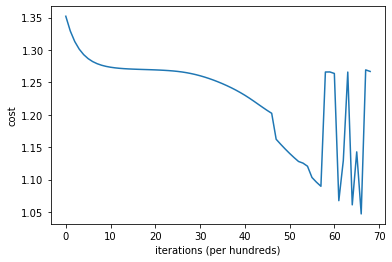

In [44]:

plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')

plt.show()


In [45]:
def predict(parameters, X):
    """
    Using the learned parameters, predicts a class for each example in X
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    X -- input data of size (n_x, m)
    
    Returns
    predictions -- vector of predictions of our model (red: 0 / blue: 1)
    """
    
    # Computes probabilities using forward propagation, and classifies to 0/1 using 0.5 as the threshold.
    ### START CODE HERE ### (≈ 2 lines of code)
    
    A2, cache = forward_propagation(X, parameters)
    predictions = np.argmax(A2,axis=0)
    ### END CODE HERE ###
    
    return predictions


In [46]:
parameters


{'W1': array([[nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan],
        [nan, nan]]), 'b1': array([[nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan],
        [nan]]), 'W2': array([[nan, nan, nan, nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan, nan, nan]]), 'b2': array([[nan],
        [nan],
        [nan],
        [nan]]), 'W3': array([[nan, nan, nan, nan],
        [nan, nan, nan, nan],
        [nan, nan, nan, nan]]), 'b3': array([[nan],
        [nan],
        [nan]])}

In [47]:
pred=predict(parameters, X_train)
count=0
count1=0
pred1=predict(parameters,X_val.T)
i=0
j=0
while i<300:
    if(pred[i]==expected_out[i]):
        count=count+1
    i=i+1
while j<150:
    if(pred1[j]==expected_out1[j]):
        count1=count1+1
    j=j+1
print("train accuracy =",count/301)
print("test accuracy =",count1/150)

train accuracy = 0.34551495016611294
test accuracy = 0.31333333333333335


In [ ]:
def plot_decision_boundary(model, X, y):
    # Set min and max values and give it some padding
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole grid
    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y, cmap=plt.cm.Spectral)
plot_decision_boundary(lambda x: predict(parameters, x.T), X_train, Y_train)   

In [ ]:
X_train=X_train.T

In [ ]:
W1 = parameters['W1']
b1 = parameters['b1']
W2 = parameters['W2']
b2 = parameters['b2']
W3 = parameters['W3']
b3 = parameters['b3']

In [ ]:
def last_layer(j):
    import matplotlib.pyplot as plt
    from mpl_toolkits.mplot3d import Axes3D
    import numpy as np
    x_min, x_max = X_train[0, :].min() - 1, X_train[0, :].max() + 1
    y_min, y_max = X_train[1, :].min() - 1, X_train[1, :].max() + 1
    b = np.arange(x_min,x_max, 0.2)
    d = np.arange(y_min, y_max, 0.2)

    B, D = np.meshgrid(b, d)
    X =np.c_[B.ravel(), D.ravel()]
    x1=np.tanh(np.dot(W1, X.T) + b1)
    x2=np.tanh(np.dot(W2, x1) + b2)
    x3=np.tanh(np.dot(W3, x2) + b3)
    nu=x3[j]
    nu=nu.reshape(B.shape[0],B.shape[1])
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.plot_surface(B, D, nu)
    plt.xlabel('X1')
    plt.ylabel('X2')
    
    plt.show()
def first_layer(j):
    import matplotlib.pyplot as plt
    from mpl_toolkits.mplot3d import Axes3D
    import numpy as np
    x_min, x_max = X_train[0, :].min() - 1, X_train[0, :].max() + 1
    y_min, y_max = X_train[1, :].min() - 1, X_train[1, :].max() + 1
    b = np.arange(x_min,x_max, 0.2)
    d = np.arange(y_min, y_max, 0.2)

    B, D = np.meshgrid(b, d)
    X =np.c_[B.ravel(), D.ravel()]
    x1=np.tanh(np.dot(W1, X.T) + b1)
    x2=np.tanh(np.dot(W2, x1) + b2)
    x3=np.tanh(np.dot(W3, x2) + b3)
    nu=x1[j]
    nu=nu.reshape(B.shape[0],B.shape[1])
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.plot_surface(B, D, nu)
    plt.xlabel('X1')
    plt.ylabel('X2')
    
    plt.show()
def second_layer(j):
    import matplotlib.pyplot as plt
    from mpl_toolkits.mplot3d import Axes3D
    import numpy as np
    x_min, x_max = X_train[0, :].min() - 1, X_train[0, :].max() + 1
    y_min, y_max = X_train[1, :].min() - 1, X_train[1, :].max() + 1
    b = np.arange(x_min,x_max, 0.2)
    d = np.arange(y_min, y_max, 0.2)

    B, D = np.meshgrid(b, d)
    X =np.c_[B.ravel(), D.ravel()]
    x1=np.tanh(np.dot(W1, X.T) + b1)
    x2=np.tanh(np.dot(W2, x1) + b2)
    x3=np.tanh(np.dot(W3, x2) + b3)
    nu=x2[j]
    nu=nu.reshape(B.shape[0],B.shape[1])
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.plot_surface(B, D, nu)
    plt.xlabel('X1')
    plt.ylabel('X2')
    
    plt.show()
          

In [ ]:
last_layer(0)
last_layer(1)
last_layer(2)

In [ ]:
plt.show()

In [ ]:
first_layer(0)
first_layer(1)
first_layer(2)
first_layer(4)
first_layer(5)


In [ ]:
second_layer(0)
second_layer(1)
second_layer(2)
second_layer(4)



In [ ]:
#10000 iterations
first_layer(0)
first_layer(1)
first_layer(2)
first_layer(4)
first_layer(5)
second_layer(0)
second_layer(1)
second_layer(2)
second_layer(4)
last_layer(0)
last_layer(1)
last_layer(2)

In [ ]:
# 1 iteration
first_layer(0)
first_layer(1)
first_layer(2)
first_layer(4)
first_layer(5)
second_layer(0)
second_layer(1)
second_layer(2)
second_layer(4)
last_layer(0)
last_layer(1)
last_layer(2)